## Drawdown
Drawdown is the maximum decline from peak to trough during a specific period before a new peak is reached. Every trading strategy experiences drawdowns. Computing it helps you compare the relative riskiness between assets or strategies.

In [1]:
import yfinance as yf 
import numpy as np

In [6]:
data = yf.download("SPY", start="2020-01-01", end="2022-07-31", auto_adjust=False)
returns = data["Adj Close"].pct_change()
# print(data.columns)

[*********************100%***********************]  1 of 1 completed


# Creating drawdown function
Drawdown is computed with 4 lines of code.
When computing returns, the first value is turned into np.nan. we replace it with a 0.0 to compute cumulative returns. Then we create a cumulative return series which is the cumulative product of 1 plus the return. Next, we use NumPy's accumulate function. Accumulate tracks the running maximum value which is perfect for keeping tabs on the peak return.

In [7]:
def drawdown(returns):
    """Determines the drawdown
    
    Parameters
    ----------
    returns : pd.Series
        Daily returns of an asset, noncumulative
    
    Returns
    -------
    drawdown : pd.Series
    
    """

    # replace the first nan value with 0.0
    returns.fillna(0.0, inplace=True)

    # create cumulative returns
    cumulative = (returns + 1).cumprod()

    # np.maximum.accumulate takes the running max value
    # of the input series. in this case, it will maintain
    # the running maximum value. this is the running
    # maximum return
    running_max = np.maximum.accumulate(cumulative)

    # compute the change between the cumulative return
    # and the running maximum return
    return (cumulative - running_max) / running_max

<Axes: xlabel='Date'>

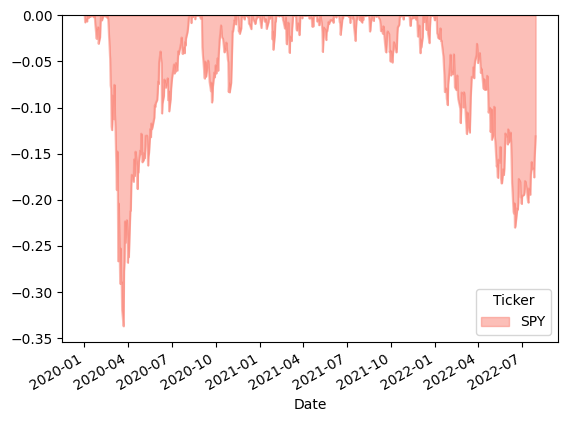

In [8]:
drawdown(returns).plot(kind="area", color="salmon", alpha=0.5)

This chart shows SPY dropping 33.7% from its peak to trough return in 2020.

## MaxDrawdown Function

In [9]:
def max_drawdown(returns):
    """ Determines the maximum drawdown
    
    Parameters
    ----------
    returns : pd.Series
        Daily returns of an asset, noncumulative
    
    Returns
    -------
    max_drawdown : float
    
    """

    return np.min(drawdown(returns))

max_drawdown applies the drawdown function to 30 days of returns and figures out the smallest (most negative) value that occurs over those 30 days. Then it moves forward one day, computes it again, until the end of the series

<Axes: xlabel='Date'>

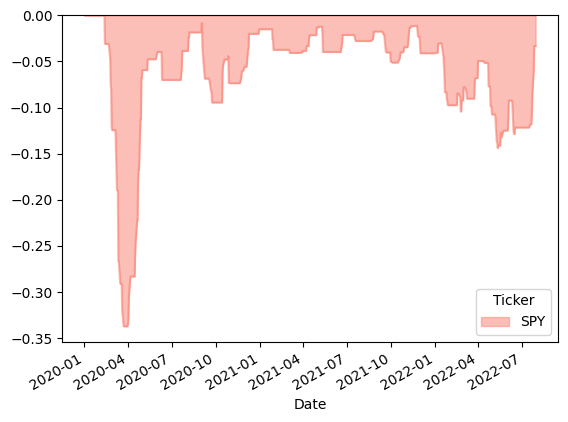

In [10]:
returns.rolling(30).apply(max_drawdown).plot(kind="area", color="salmon", alpha=0.5)

MaxDrawdown and Drawdown are useful indicators of the riskiness of a stock, portfolio, or strategy.